# Project 1:[TMDB Movie Dataset Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='conclusions'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb). 
I will first check the data for any abnormalities, clean it and then try to answer some questions like the most successful year in the movie industry using the dataset and then draw conclusions using the code output
>
The dataset have the following attributes
- **Rows**: 10866
>
>
- **Columns**: 21
>
- **Column Names**:       
>   - id: Identification Number
>   - imdb_id: IMDb Identification Number
>   - popularity: Popularity in number
>   - budget: Gross Budget
>   - revenue: Gross Revenue
>   - original_title: Title of the Movie
>   - cast: Cast
>   - homepage: Movie website homepage
>   - director: The person who directed the movie
>   - tagline: 
>   - keywords: 
>   - overview: Overview of the movie 
>   - runtime: How long the movie last
>   - genres: What genres the movie belong to
>   - production_companies: What are the companies produced the movie
>   - release_date: The date the movie was released
>   - vote_count: How many people voted for the movie
>   - vote_average: The average vote rate our of 10
>   - release_year: Released Year
>   - budget_adj: Movie Budget including 2010 inflnation
>   - revenue_adj': Movie Revenue including 2010 inflnation

### Question(s) for Analysis
>I will try to answer the following questions using this dataset
- Which movies are profitable but not popular
- Which movie runtime got higher customer vote rate
- Which was the most successful year in the movie industry according to the data given
>
>  

In [3]:
#importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the dataset into the data frame using pandas read_csv function
tmdb=pd.read_csv("tmdb-movies.csv", sep=',',index_col='id')
tmdb.head()
#I specified the id column to be the index of the dataframe
#The dataset has 10866 rows and 21 columns but i used id column has the index column

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='conclusions'></a>
## Data Wrangling


In [3]:
#First we will see the columns with NULL values
tmdb.isna().sum()
#imdb_id,homepage,cast,director,tagline,keywords,overview,genres,production_companies columns had NULL values.
#Since i will not need the above columns with NULL values, I am going to drop the columns to clean my data
tmdb.drop(columns=['imdb_id','homepage', 'cast','director','tagline','keywords','overview','genres','production_companies'],inplace=True)
tmdb.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [4]:
#confirming there is no more NULL values
tmdb.isna().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [5]:
#Checking on any availability of duplicates on the dataset rows
tmdb.duplicated().sum()
#it is noticeable that there is only a single duplicate
#We are therefore going to drop it as well because it will insignifically affect our data
tmdb.drop_duplicates(inplace=True)
#confirming if there is no more duplicates
tmdb.duplicated().sum()

0

In [6]:
#To clean the data, i will look into each column datatype and make changes where necessary
tmdb.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [7]:
#I will have to change the vote_count into millions 
#replacing the year part with the "release_year" column
#Then convert the datatype
tmdb.release_date= tmdb.apply(lambda x: x.release_date[:-2] + str(x.release_year), axis=1)

In [8]:
#We then change the vote_count column to millions by dividing its values by a million
tmdb.vote_count=tmdb.vote_count/1000000
tmdb.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
release_date       object
vote_count        float64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

<a id='conclusions'></a>
## EXPLORATORY DATA ANALYSIS


In [176]:
#first lets look at the statistical characteristics of the data
tmdb.describe()
#the description shows that there are 0 values for revenue, budget and runtime

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#summing the number of Zeros in each of the column
tmdb[['budget','revenue','runtime']].apply(lambda x: x==0).sum()

budget     5696
revenue    6016
runtime      31
dtype: int64

In [7]:
#Isolating the data points without any zero values in [budget, revenue, runtime] columns
without_zeros=tmdb[(tmdb.budget!=0)&(tmdb.revenue!=0)&(tmdb.runtime!=0)]
without_zeros.shape

(3855, 20)

Text(0.5, 0.98, 'Box plot for Dataset with Zeros and without Zeros')

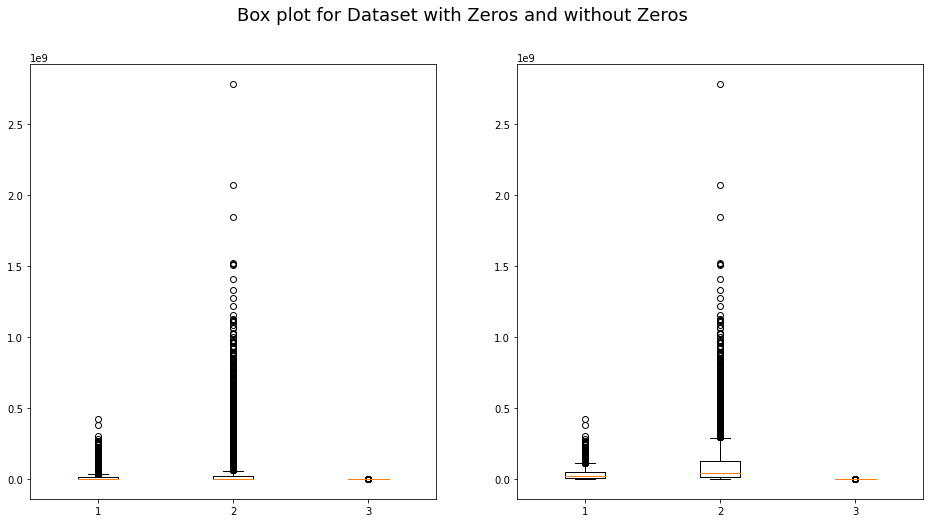

In [11]:
#checking the box plot of dataset containing zeros and after removing zero values
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
ax[0].boxplot(tmdb[['budget','revenue','runtime']])
ax[1].boxplot(without_zeros[['budget','revenue','runtime']])
plt.suptitle("Box plot for Dataset with Zeros and without Zeros",fontsize=18)

Since a massive amount of data is lost by dropping the zeros by the look of the graph above, i will instead replace the 0s with mean values. However, filling the revenue column with the mean will at point be inappropriate because the movie actually might have nnot generated any revenue

In [20]:
#calculating the mean value for each year
years_mean= tmdb.groupby('release_year')[['budget','revenue','runtime']].mean()
years_mean.head()

,budget,revenue,runtime
release_year,,,
1960,6.892796e+05,4.531406e+06,110.656250
1961,1.488290e+06,1.089420e+07,119.419355
1962,1.710066e+06,6.736870e+06,124.343750
1963,2.156809e+06,5.511911e+06,111.323529
1964,9.400753e+05,8.118614e+06,109.214286


In [28]:
#replacing 0(zero)values function
def replace_zeros(row: pd.DataFrame, columns: list, data_frame: pd.DataFrame):
    """Replace zeros with the corresponding values

    Args:
        row (pd.Series): A row or data point
        columns (list): A column or columns to replace their value
        data_frame (pd.DataFrame): A data frame which hold a value to replace zero
    """
    if (row[columns] == 0).all():
        row[columns] = data_frame.loc[row.release_year, columns]
        
    return row

In [26]:
missing_budget_revenue=tmdb[(tmdb.budget==0)&(tmdb.revenue==0)]
#subsetting the dataset

In [27]:
#replacing the zeros
missing_budget_revenue=missing_budget_revenue.apply(
lambda x:replace_zeros(x,['budget','revenue'],years_mean),axis=1)
tmdb[tmdb.index.isin(missing_budget_revenue.index)]=missing_budget_revenue

In [30]:
#checking
print(tmdb[(tmdb.budget==0)&(tmdb.revenue==0)].shape)

(0, 20)


In [33]:
#replacing the zeros in the budget and runtime column
missing_runtime=tmdb[tmdb.runtime==0]
missing_budget=tmdb[tmdb.budget==0]
missing_runtime=missing_runtime.apply(lambda x: replace_zeros(x, ['runtime'], years_mean),axis=1)
missing_budget=missing_budget.apply(lambda x: replace_zeros(x,['budget'], years_mean), axis=1)
tmdb[tmdb.index.isin(missing_runtime.index)]=missing_runtime
tmdb[tmdb.index.isin(missing_budget.index)]=missing_budget

In [35]:
#checking
print(tmdb[tmdb.budget==0].shape)
print(tmdb[tmdb.runtime==0].shape)


(0, 20)
(0, 20)


In [37]:
#dropping the zero values still existing in revenue column
tmdb.drop(tmdb[tmdb.revenue==0].index,inplace=True)
print(tmdb.shape)

(9551, 20)


In [38]:
tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9551.000000,9.551000e+03,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9.551000e+03,9.551000e+03
mean,0.679171,2.328101e+07,6.441751e+07,102.524184,239.103026,6.021841,2001.336509,1.785477e+07,5.843631e+07
std,1.055443,2.954048e+07,1.184569e+08,31.228898,609.644785,0.915384,12.770468,3.579375e+07,1.529237e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208402,1.100000e+07,2.107353e+07,90.000000,17.000000,5.500000,1994.500000,0.000000e+00,0.000000e+00
50%,0.392875,1.568803e+07,3.989152e+07,99.000000,41.000000,6.100000,2006.000000,0.000000e+00,5.980000e+03
75%,0.761879,2.331382e+07,5.225040e+07,112.000000,169.500000,6.600000,2011.000000,2.103337e+07,4.539346e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='conclusions'></a>
## Answering The Questions

- **Question 1: Which movies are more profitable but not popular**
>First, i need to filter out the popular movies by taking 75% and above percentile and also net_profit

In [39]:
#storing net profit of the movies to net_profit column
tmdb['profit']=tmdb.revenue-tmdb.budget
tmdb.profit.head()

id
135397    1.363529e+09
76341     2.284364e+08
262500    1.852382e+08
140607    1.868178e+09
168259    1.316249e+09
Name: profit, dtype: float64

In [40]:
#getting the cutpoint to determine the most profitable movies(above 75 percentile) and less profitable movies(less than 25 percentile)
tmdb.profit.describe()

count    9.551000e+03
mean     4.113650e+07
std      9.943375e+07
min     -4.139124e+08
25%      7.323364e+06
50%      2.348878e+07
75%      3.049428e+07
max      2.544506e+09
Name: profit, dtype: float64

In [51]:
#filtering the most most profitable
profitable= tmdb[tmdb.profit>=3.049428]
profitable.shape

(7886, 21)

In [52]:
#getting the cutting point
tmdb.popularity.describe()

count    9551.000000
mean        0.679171
std         1.055443
min         0.000065
25%         0.208402
50%         0.392875
75%         0.761879
max        32.985763
Name: popularity, dtype: float64

In [78]:
#knowing the popular movies
popular=tmdb[tmdb.popularity>=0.761879]
popular

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
id,,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
76341,tt1392190,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
262500,tt2908446,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
140607,tt2488496,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
168259,tt2820852,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,tt0077651,1.198849,3.000000e+05,7.000000e+07,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,female nudity|nudity|mask|babysitter|halloween,...,91.0,Horror|Thriller,Compass International Pictures|Falcon Internat...,10/25/78,522,7.3,1978,1.002810e+06,2.339890e+08,6.970000e+07
8469,tt0077975,1.157930,2.700000e+06,1.410000e+08,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,female nudity|sex|nudity|collage|fraternity,...,109.0,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08,1.383000e+08
6081,tt0078163,1.090065,3.215339e+06,4.957927e+07,Revenge of the Pink Panther,Peter Sellers|Andrew Sachs|Herbert Lom|Burt Kw...,NaN,Blake Edwards,Just when you thought it was safe to go back t...,inspector,...,104.0,Action|Comedy|Thriller|Crime|Family,United Artists|Jewel Productions|Pimlico Films...,7/19/78,56,6.2,1978,0.000000e+00,1.657287e+08,4.636393e+07


Text(0, 0.5, 'Number of Movies')

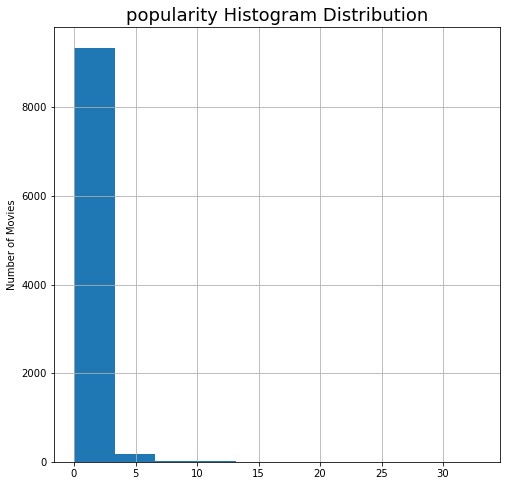

In [65]:
#visualizing popularity
tmdb.popularity.hist(figsize=(8,8))
plt.title("popularity Histogram Distribution", fontsize=18);
plt.ylabel("Number of Movies")

As seen in this graph, most of the movies are not popular.Approximately 5% of the movies are popular

In [80]:
#Knowing the unpopulor movies
unpopular=tmdb[tmdb.popularity<=0.208402]
unpopular
#running this code shows that there are approximately 2717 unpopulor movies in this dataset

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
id,,,,,,,,,,,,,,,,,,,,,
357681,tt4973112,0.198522,1.207718e+07,4.254762e+07,Hitting the Apex,Brad Pitt|Valentino Rossi|Jorge Lorenzo|Casey ...,http://hittingtheapexfilm.com/,Mark Neale,NaN,fighter|motos,...,138.000000,Documentary,First Movie Companie,9/2/15,14,8.0,2015,0.0,0.0,3.047043e+07
295490,tt3704416,0.171829,1.207718e+07,4.254762e+07,Digging for Fire,Jake Johnson|Rosemarie DeWitt|Orlando Bloom|Br...,NaN,Joe Swanberg,NaN,NaN,...,83.000000,Drama,Lucky Coffee Productions,8/21/15,35,4.9,2015,0.0,0.0,3.047043e+07
339355,tt2547172,0.202673,1.207718e+07,4.254762e+07,Larry Gaye: Renegade Male Flight Attendant,Mark Feuerstein|Henry Winkler|Jason Alexander,NaN,Sam Friedlander,NaN,NaN,...,99.000000,Comedy,Ascot Elite Home Entertainment,6/5/15,12,5.3,2015,0.0,0.0,3.047043e+07
339342,tt2948712,0.097514,1.207718e+07,4.254762e+07,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,tattoo|tattooing,...,96.375199,Horror,NaN,1/1/15,15,5.6,2015,0.0,0.0,3.047043e+07
282313,tt1867091,0.154846,1.207718e+07,4.254762e+07,The Reconstruction of William Zero,Conal Byrne|Amy Seimetz|Tim Habeger|Adam Frist...,NaN,Dan Bush,You can't run from yourself,genetics|memory|accident,...,98.000000,Science Fiction|Drama|Thriller,FilmBuff|Floren Shieh Productions,4/11/15,14,5.1,2015,0.0,0.0,3.047043e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5060,tt0060214,0.087034,1.251191e+06,1.842102e+06,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,monster|carry on|horror spoof,...,87.000000,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.0,5.909106e+05
21,tt0060371,0.080598,1.251191e+06,1.842102e+06,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,...,95.000000,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.0,5.909106e+05
20379,tt0060472,0.065543,1.251191e+06,1.842102e+06,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,...,176.000000,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.0,5.909106e+05


In [83]:
#Filtering the unpopular but more profitable movies
unpopulor_profitable=profitable[~profitable.index.isin(popular.index)]
unpopulor_profitable

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
id,,,,,,,,,,,,,,,,,,,,,
253161,tt2334733,0.729900,1.207718e+07,4.254762e+07,Madame Bovary,Mia Wasikowska|Ezra Miller|Laura Carmichael|He...,NaN,Sophie Barthes,NaN,period piece|social status|extramarital affair...,...,118.0,Drama,A Company Filmproduktionsgesellschaft|Aleph Mo...,6/4/15,52,5.3,2015,0.0,0.0,3.047043e+07
312831,tt2474976,0.719407,1.207718e+07,4.254762e+07,The Hallow,Joseph Mawle|Bojana NovakoviÄ‡|Michael McElhat...,http://www.corinhardy.com/the-woods/,Corin Hardy,Nature has a dark side.,baby|fairy tale|tree|transformation|mill,...,97.0,Fantasy|Horror,Prescience|Bord Scannan na hEireann / Irish Fi...,11/6/15,122,4.9,2015,0.0,0.0,3.047043e+07
316322,tt4215332,0.714131,1.207718e+07,4.254762e+07,Barbie in Princess Power,Britt Irvin|Michael Kopsa|Kelly Sheridan,NaN,Zeke Norton,Take flight with a new kind of princess!,barbie|princess|super powers,...,74.0,Family|Animation,Mattel Playground Productions,1/29/15,13,5.5,2015,0.0,0.0,3.047043e+07
301846,tt2393827,0.707355,1.207718e+07,4.254762e+07,Howl,Ed Speleers|Shauna Macdonald|Elliot Cowan|Holl...,NaN,Paul Hyett,Last Train. Full Moon. All Change.,england|fire|conductor|chase|transformation,...,89.0,Horror,Starchild Pictures,10/1/15,62,4.9,2015,0.0,0.0,3.047043e+07
332340,tt3064298,0.701370,1.207718e+07,4.254762e+07,Man Up,Simon Pegg|Lake Bell|Rory Kinnear|Ken Stott|Ha...,https://www.facebook.com/ManUpFilm,Ben Palmer,Stop being such a loser.,bowling|blind date|party|mistaken identity|wed...,...,88.0,Romance|Comedy,Big Talk Productions|StudioCanal,5/29/15,264,6.5,2015,0.0,0.0,3.047043e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5060,tt0060214,0.087034,1.251191e+06,1.842102e+06,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,monster|carry on|horror spoof,...,87.0,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.0,5.909106e+05
21,tt0060371,0.080598,1.251191e+06,1.842102e+06,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,...,95.0,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.0,5.909106e+05
20379,tt0060472,0.065543,1.251191e+06,1.842102e+06,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,...,176.0,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.0,5.909106e+05


In [57]:
#calculating how much percent of unpopulor movies are in profitable movies
unpopular.index.isin(profitable.index).sum()/unpopular.shape[0]*100

89.36348408710218

From the above output,1768 of the profitable movies are unpopulor. 89% of unpopulor movies are profitable indicating that movie popularity may not necessarily signify the profitability of a movie 

- **Question 2: which movie runtime got higher customer vote rate?**

In [58]:
#Findning the mean of the runtime
tmdb.runtime.describe()

count    9551.000000
mean      102.524184
std        31.228898
min         2.000000
25%        90.000000
50%        99.000000
75%       112.000000
max       900.000000
Name: runtime, dtype: float64

In [59]:
#getting the mean of 'vote_average' and runtime
runtime_vote_mean=tmdb.groupby('runtime').vote_average.mean()
#Getting the maximum of 'vote_average'
max_vote_average=runtime_vote_mean.max()
#getting the runtimes with maximum 'vote average'
runtime_vote_mean[runtime_vote_mean==max_vote_average]

runtime
900.0    9.2
Name: vote_average, dtype: float64

900 runtime got a high vote_average value of 9.2

- **Question 3: Which was the most successful year in the movie industry according to the data given**

In [60]:
#Calculating the number of movies for each year
years_mean['count']=tmdb.groupby('release_year').size().reindex(years_mean.index)
years_mean

,budget,revenue,runtime,count
release_year,,,,
1960,6.892796e+05,4.531406e+06,110.656250,28
1961,1.488290e+06,1.089420e+07,119.419355,28
1962,1.710066e+06,6.736870e+06,124.343750,25
1963,2.156809e+06,5.511911e+06,111.323529,29
1964,9.400753e+05,8.118614e+06,109.214286,38
1965,2.005860e+06,1.308805e+07,118.171429,29
1966,1.251191e+06,1.842102e+06,106.891304,39
1967,2.516305e+06,1.844587e+07,104.950000,35
1968,1.844590e+06,6.788025e+06,107.282051,33


In [61]:
#Determining the most profitable year
successful_year=years_mean[years_mean.revenue == years_mean.revenue.max()]
successful_year

,budget,revenue,runtime,count
release_year,,,,
1997,2.474524e+07,5.549569e+07,106.505208,166


In [62]:
shape_success=profitable[profitable.release_year == successful_year.index[0]].shape
shape_success[0]

128

128 movies recorded 25% of the highest profit

<a id='conclusions'></a>
## Conclusion
TMDb dataset required a lot of wrangling and cleaning.The data has only one duplicate which i dropped because it was insiIn average,there were `11700` in correct (i.e., zero) values for both `budget` and `revenue` column. Dropping the `zero` valued data points of `budget` and `revenue` affect the dataset. Dropping them means losing half of the data points collected. This was evident in the box plot drown plotting the dataset wit and without the 0s(zero)values.Instead, I filtered out the data points with zero values for both `budget` and `revenue` columns and filled them with the mean. To make the distribution easy, I computed the mean of `budget` and `revenue` columns for each `release_year`, and filled the data points with their respective `release_year`. The data point with either the `budget` or `revenue` values of zeros got dropped. This method helped me to keep `9551` data points.gnificant.It also as numerous `NULL` values in various columns but since my analysis needed not some of those columns, i dropped them. I had to convert some data typees. particularly, i changed the vote_count values into millions.
This data was then used to answer three questions.
First,i was determine the movies which were not populor but still profitable.A  bar grapgh of the popularity data set, showed that almost 95% of the movies were unpopular. Movies were ranked to be populo or not by using the descriptive statistics of 25 percentile and 75 percentile of the popularity column.Profitable movies were similarly determined using the revenue column descriptive statistics. Profitable movies were 7886.UnPopular movies were 2388(<=25% popularity column)but 89% of the unpopulor movies were among the profitable movies.This could mean that popularity might not be a good indicator of determining if the movie is profitable or not.
Secondly,on determining which movie runtime had higher customer vote rate. i got the runtime with maximum vote average after first getting the average of runtime and vote average. it was evident from the analysis that 900 runtime had the highest vote average of 9.2.
Finaly, i was to determine the most successful year in the movie industry.i first got movies grouped per year and then got the most successful year by concating the movies per year and the revenue they recorded. The analysis showed that 1997 which had a count of 166 movies was the most successful year with 128 of the movies in that year recording almost 25% of the highest profit.

# Limitation
Most of its columns are filled with 'NULL' values and 'outliers.' Because of the outlying data points, the column values do not sit in a single range of values, making comparison between columns difficult. For example, it is difficult to determine the relationship between 'popularity' and 'vote count' because the values in the 'popularity' column are sometimes in the millions or tens of hundreds of millions. The 'vote count' column suffers from the same problem.
